In [1]:
import pandas as pd
import datetime

from capstone_modules import Production_Data, Temperature_Data, ICO_Composite_Indicator

from statsmodels.tsa.seasonal import seasonal_decompose

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Import data

In [2]:
temperatures = Temperature_Data()
production = Production_Data()

## Visualizing seasonal decomposition

In [3]:
bn_temperatures = temperatures.get_temperature_data_by_ICO_category("Brazilian Naturals")

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  if __name__ == '__main__':
//anaconda/lib/python3.5/site-packages/statsmodels/tsa/filters/filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


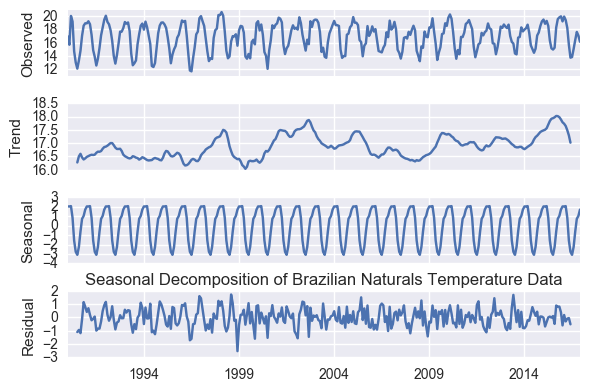

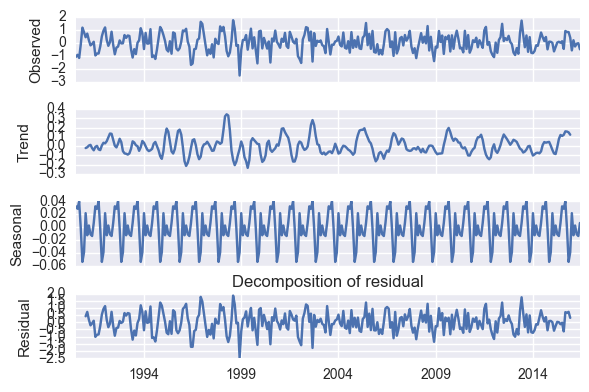

In [4]:
bn_temperatures_monthly_averages = bn_temperatures[bn_temperatures.index.year >= 1990]["Temperature (C)"].resample("M", 'mean')

seasonal_decompose(bn_temperatures_monthly_averages).plot()
plt.title("Seasonal Decomposition of Brazilian Naturals Temperature Data")
plt.show()

seasonal_decompose(seasonal_decompose(bn_temperatures_monthly_averages).resid.dropna()).plot()
plt.title("Decomposition of residual")
plt.show()

//anaconda/lib/python3.5/site-packages/statsmodels/tsa/filters/filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


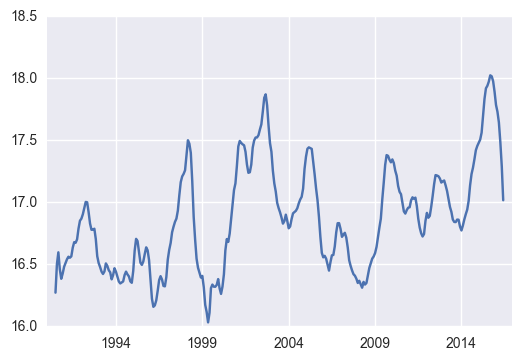

In [5]:
seasonal_decompose(bn_temperatures_monthly_averages).trend.plot()
plt.show()

In [6]:
aggregate_temperatures = temperatures.temperature_data.resample("M", 'mean')
aggregate_temperatures.head()


//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  if __name__ == '__main__':


,Temperature (C),Arabica Production,Robusta Production,Frost likelihood
1849-01-31,23.905,0.0,1.0,0.001750
1849-02-28,24.080,0.0,1.0,0.001725
1849-03-31,24.092,0.0,1.0,0.001723
1849-04-30,23.185,0.0,1.0,0.001860
1849-05-31,22.837,0.0,1.0,0.001917


In [7]:
pd.Series(production.get_production_share_dictionary()["Robusta", "Brazil"], name = "Production Share").head()


1960    NaN
1961    0.0
1962    0.0
1963    0.0
1964    0.0
Name: Production Share, dtype: float64

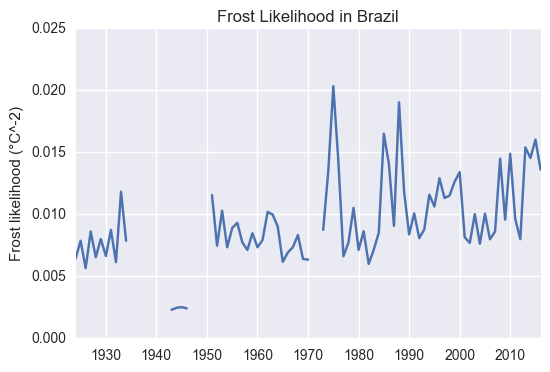

In [9]:
temperatures.get_temperature_data_by_country()["Frost likelihood"].resample("A").max().plot()
plt.title("Frost Likelihood in Brazil")
plt.ylabel("Frost likelihood (°C^-2)")
plt.show()